<a href="https://colab.research.google.com/github/Jdasanja/masers_thesis/blob/main/masters_thesis_11_10_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>Heart Disease - UCI Machine Learning Repository </h1>**

The Heart Disease dataset, donated in 1988 to UC Irvine, includes data from four databases: Cleveland, Hungary, Switzerland, and the VA Long Beach. It is used for classification tasks in health and medicine, consisting of 303 instances and 13 main features, with mixed types (categorical, integer, and real values). Although the database has 76 total attributes, most research focuses on a subset of 14 attributes, especially from the Cleveland database. The goal attribute indicates the presence of heart disease on a scale from 0 (no presence) to 4, with studies typically aiming to differentiate between presence (1-4) and absence (0) of disease.

Key features include age, sex, chest pain type (cp), resting blood pressure (trestbps), serum cholesterol (chol), maximum heart rate (thalach), exercise-induced angina (exang), and ST depression (oldpeak). The data has missing values, and patients’ identification numbers and social security numbers have been anonymized. The introductory paper linked to this dataset is by Detrano et al. (1989), published in the American Journal of Cardiology.

**Importing the Dataset**

  Note: I downloaded and uploaded the dataset from the <a href="https://archive.ics.uci.edu/dataset/45/heart+disease" target="_blank">Heart Disease - UCI Machine Learning Repository</a>, including all available data files.
    
  The dataset did not come with column headers, so I added them based on the order in which they appeared in the variable table on the UCI Machine Learning Repository website.
    
   For this project, I will initially focus on using only the <strong>processed.cleveland.data</strong> file.
    
  The data folder included a warning message:
    
  <blockquote>
      <strong>"The file cleveland.data was unfortunately corrupted when we lost node cip2 and transferred it to node ics. However, the file processed.cleveland.data appears to be intact and usable (for the 14 attributes). I will clean up cleveland.data as soon as possible.</strong>
        
  <strong>Bad news: my original copy of the database seems corrupted. I will need to contact the original data donor to obtain a new copy.</strong>
        
  <strong>David Aha"</strong>
 </blockquote>


In [ ]:
# import pandas for reading and displaying local file
import pandas as pd

In [ ]:
# Load the dataset from the raw GitHub URL
url = 'https://raw.githubusercontent.com/Jdasanja/masers_thesis/main/processed.cleveland.data'
df = pd.read_csv(url, header=None)

# Add column names (based on standard attribute names for the Cleveland dataset)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'num']

# Add a unique identifier column
df['patient_id'] = range(1, len(df) + 1)

# Set 'patient_id' as the index
df.set_index('patient_id', inplace=True)

# Display first few rows of the uploaded file with headers
print("First few rows of the uploaded file with column headers:")
print(df.head())


First few rows of the uploaded file with column headers:
             age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
patient_id                                                                  
1           63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
2           67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
3           67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
4           37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
5           41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   

            oldpeak  slope   ca thal  num  
patient_id                                 
1               2.3    3.0  0.0  6.0    0  
2               1.5    2.0  3.0  3.0    2  
3               2.6    2.0  2.0  7.0    1  
4               3.5    3.0  0.0  3.0    0  
5               1.4    1.0  0.0  3.0    0  


**Splitting into Training and Testing Sets**


Splitting data into training and testing sets is crucial for building reliable machine learning models. The training set is used to teach the model by allowing it to learn patterns from the data, while the testing set evaluates the model’s performance on unseen data. This helps ensure that the model generalizes well and performs accurately on new, real-world data, reducing the risk of overfitting, where the model may perform well on training data but poorly on new data.

The dataset was split using the Sklearn library in python:<br>
sklearn, or scikit-learn, is an open-source Python library; it offers tools for data preprocessing, model training, and evaluation, with built-in algorithms for tasks like classification and regression

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming `df` is your DataFrame
# Drop the unique identifier and the target column from features
X = df.drop(columns=['num'])

# Separate the target
y = df['num']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, X_train and X_test contain only relevant feature columns
# y_train and y_test contain only the target variable

**Exploring the Training Set**

In [ ]:
# Explore the training set
print("DataFrame.info():")
df.info()

print("\nDataFrame.describe():")
print(df.describe())

DataFrame.info():
<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 35.5+ KB

DataFrame.describe():
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    5

This dataset consists of 303 entries with 14 columns, with each column having 303 non-null values. The data types include 11 float columns, 1 integer column, and 2 object columns (likely categorical or string data for 'ca' and 'thal').

Key summary statistics:

<strong>age:</strong> Mean is 54.4 years, ranging from 29 to 77.<br>
<strong>sex:</strong> Mostly 1 (indicating male), with a mean of 0.68, suggesting a skew toward male participants. <br>
<strong>cp (chest pain type):</strong> Ranges from 1 to 4 with a mean of 3.16, indicating more severe types are common. <br>
<strong>trestbps (resting blood pressure):</strong> Mean of 131.7, with values between 94 and 200. <br>
<strong>chol (cholesterol):</strong> Mean of 246.7, ranging from 126 to 564. <br>
<strong>fbs (fasting blood sugar > 120 mg/dl):</strong> Mostly 0, mean of 0.15. <br>
<strong>restecg (resting electrocardiographic results):</strong> Has values 0-2, with a mean close to 1. <br>
<strong>thalach (maximum heart rate achieved):</strong> Mean of 149.6, with a wide range from 71 to 202. <br>
<strong>exang (exercise-induced angina):</strong> Mostly 0, mean of 0.33. <br>
<strong>oldpeak (ST depression):</strong> Mean of 1.04, with values up to 6.2. <br>
<strong>slope (slope of the peak exercise ST segment):</strong> Mean of 1.6, indicating most fall in mid-range. <br>
<strong>num (target):</strong> Ranges from 0 to 4, indicating various degrees of heart disease risk or presence.


**Scanning the Dataframe**

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
patient_id,,,,,,,,,,,,,,
1,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
2,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
3,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
4,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
5,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
## Basic Descriptive
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.000,54.439,9.039,29.000,48.000,56.000,61.000,77.000
sex,303.000,0.680,0.467,0.000,0.000,1.000,1.000,1.000
cp,303.000,3.158,0.960,1.000,3.000,3.000,4.000,4.000
trestbps,303.000,131.690,17.600,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.693,51.777,126.000,211.000,241.000,275.000,564.000
fbs,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
restecg,303.000,0.990,0.995,0.000,0.000,1.000,2.000,2.000
thalach,303.000,149.607,22.875,71.000,133.500,153.000,166.000,202.000
exang,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200


The dataset contains 303 records across various attributes related to heart health, summarized as follows:

Age: Average age is 54.4, with a range from 29 to 77.
Sex: Predominantly male (mean of 0.68), with a binary encoding (0 and 1).
Chest Pain (cp): Average score of 3.16 on a scale from 1 to 4, indicating the severity of chest pain.
Resting Blood Pressure (trestbps): Mean of 131.7, ranging from 94 to 200.
Cholesterol (chol): Mean cholesterol level of 246.7, with values between 126 and 564.
Fasting Blood Sugar (fbs): Primarily low, with a mean of 0.15 on a binary scale (0 or 1).
Resting ECG (restecg): Average of 0.99, ranging from 0 to 2.
Max Heart Rate (thalach): Mean of 149.6, ranging from 71 to 202.
Exercise-Induced Angina (exang): Mostly absent, with a mean of 0.33 (0 or 1).
ST Depression (oldpeak): Average of 1.04, ranging from 0 to 6.2.
Slope of ST Segment (slope): Average of 1.6 on a scale from 1 to 3.
Heart Disease Indicator (num): Mean of 0.94, indicating heart disease presence severity from 0 (no disease) to 4.

In [ ]:
df.shape

(303, 14)


The dataset has 303 rows and 14 columns.

**Data Cleaning**

In [ ]:
## Total count of missing values
df.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
import numpy as np

## Replace question marks with NaN
df.replace('?', np.nan, inplace=True)

## Total count of missing values
df.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Although there were no NULL values, it did seem that there were values that contained value "?" indicating a missing data point.

In [ ]:
## Drop rows with NaN values
df.dropna(inplace=True)

## Verify if any null values remain
df.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Since there were only 6 data points with missing values,
all rows with Null Values were removed.

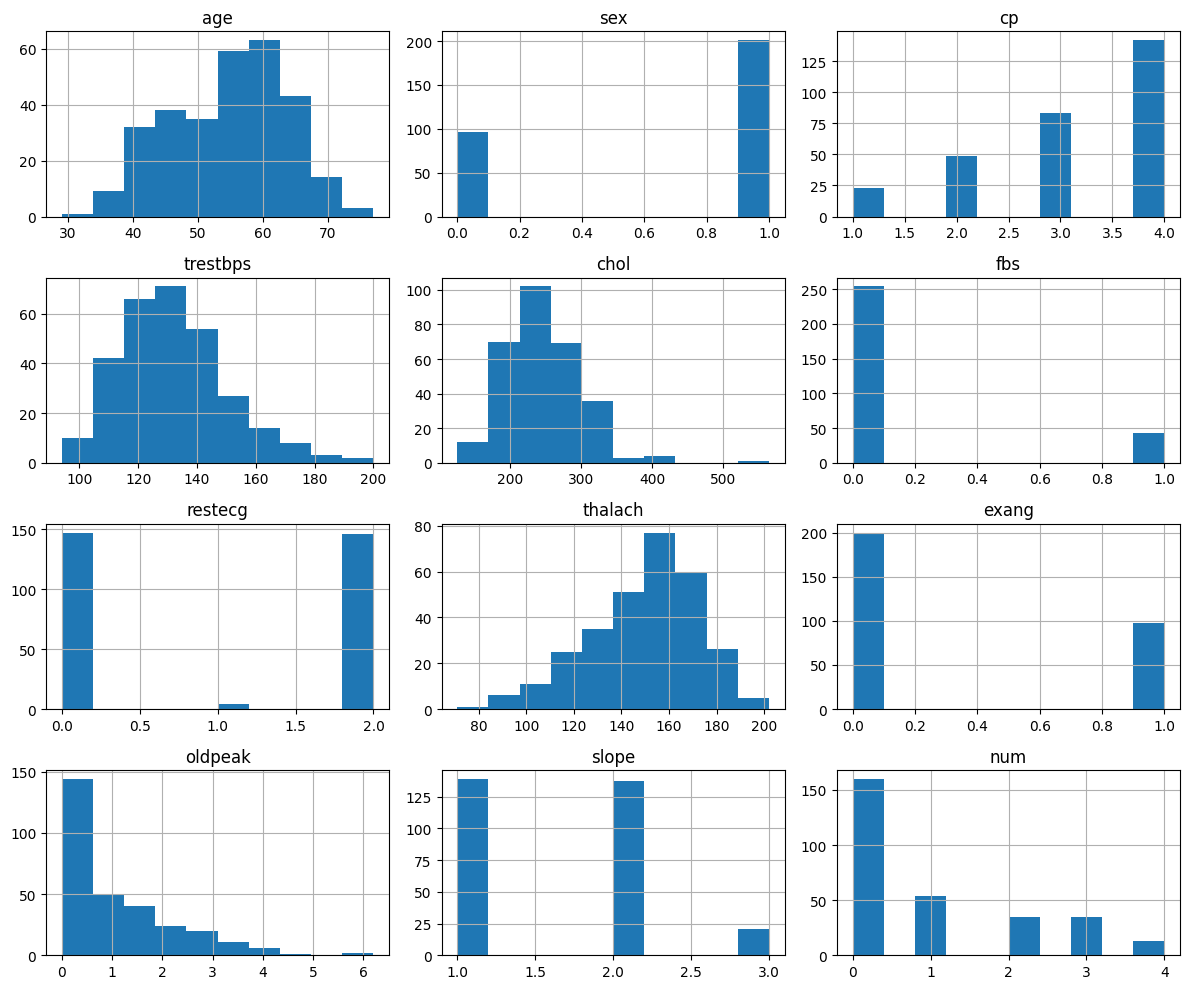

In [ ]:
import matplotlib.pyplot as plt

#Histogram
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

<strong>age:</strong> A roughly normal distribution, with most values between 40 and 70, peaking around the 50s and 60s.<br><br>

<strong>sex:</strong> Binary distribution, with a higher count for 1 (indicating a majority of one gender, likely male).<br><br>

<strong>cp (chest pain):</strong> Multi-modal distribution, with a higher frequency at 4, indicating a specific type of chest pain is more common.<br><br>

<strong>trestbps (resting blood pressure):</strong> Normally distributed around 130, ranging from about 100 to 180.<br><br>

<strong>chol (cholesterol):</strong> Right-skewed, with most values between 200 and 300, but with some extreme values above 500.<br><br>

<strong>fbs (fasting blood sugar):</strong> Primarily 0, indicating that most patients do not have fasting blood sugar above 120 mg/dl.<br><br>

<strong>restecg (resting ECG results):</strong> Primarily clustered around 0 and 1, with very few at 2.<br><br>

<strong>thalach (max heart rate achieved):</strong> Nearly normal distribution, peaking around 140-160.<br><br>

<strong>exang (exercise-induced angina):</strong> Mostly 0, suggesting that most patients did not experience exercise-induced angina.<br><br>

<strong>oldpeak (ST depression):</strong> Right-skewed, with most values between 0 and 2, but some as high as 6.<br><br>

<strong>slope (slope of ST segment):</strong> Mostly at 1 and 2, indicating most patients have these types of ST segment slopes.<br><br>

<strong>num (target variable):</strong> Right-skewed, with a high concentration at 0, indicating many patients without heart disease, and decreasing counts as the severity increases.


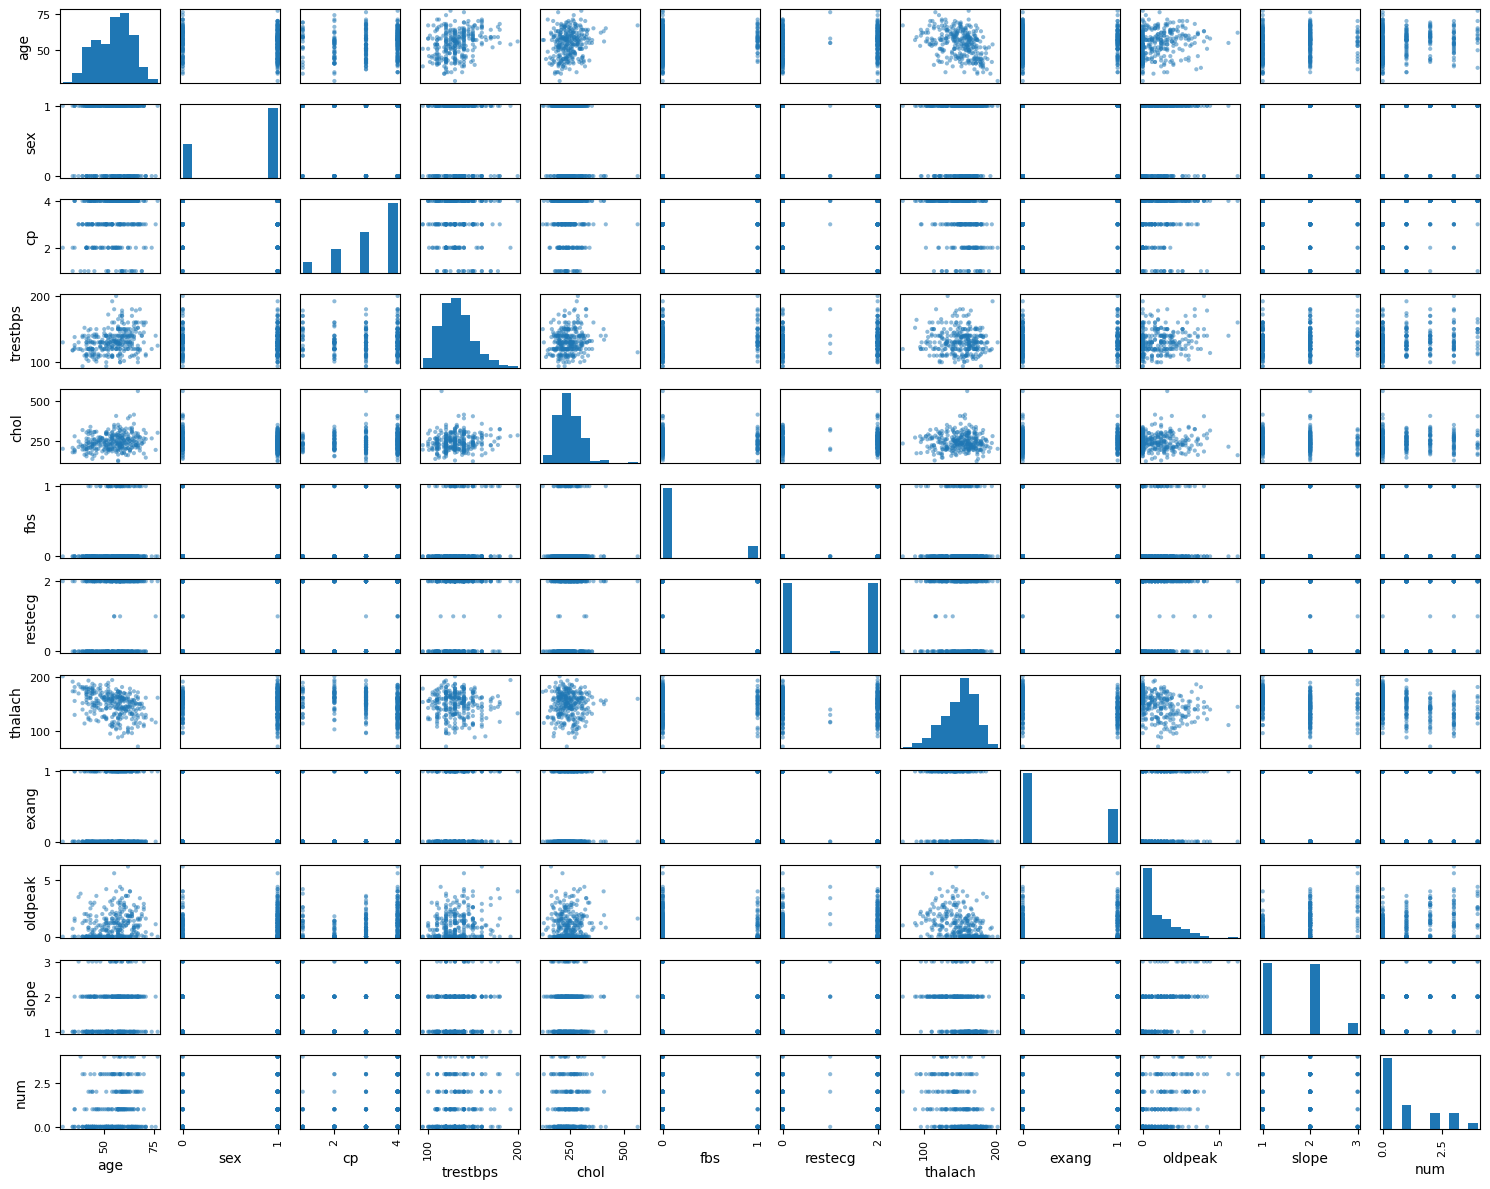

In [ ]:
#import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


scatter_matrix(df, figsize=(15, 12))
plt.tight_layout()
plt.show()

The provided image displays a pairplot (scatterplot matrix) of the dataset, showcasing relationships between the different variables. Here are some key observations:<br>
<strong>Diagonals (Histograms):</strong> The histograms on the diagonal represent the distribution of each feature individually. For instance:

<strong>age and thalach (maximum heart rate)</strong> show a spread across a wide range, indicating continuous distributions.<br>
<strong>sex, cp (chest pain type), fbs (fasting blood sugar), restecg, exang (exercise-induced angina), and slope</strong> appear to be categorical or binary features with distinct values.<br>

Scatter Plots: The off-diagonal plots display scatter plots between pairs of variables:

<strong>Age vs. Cholesterol:</strong> There is a visible trend where older age correlates with higher cholesterol levels.
<strong>Max Heart Rate (thalach) vs. num:</strong> There appears to be a negative correlation, suggesting that higher heart rates may be associated with lower heart disease indicators (num).
<strong>cp (chest pain): </strong>Shows a clustered pattern, indicating different types of chest pain distributions across other variables.

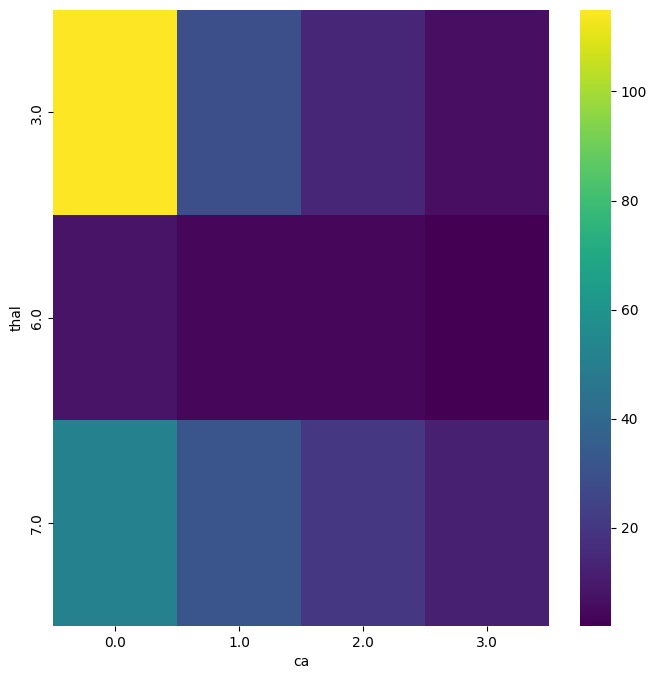

In [ ]:
# @title ca vs thal

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['thal'].value_counts()
    for x_label, grp in df.groupby('ca')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('ca')
_ = plt.ylabel('thal')

This updated heatmap shows the relationship between the thal(thallium stress test) and ca (number of major vessels colored by fluoroscopy)variables, similar to the previous heatmap but without missing data (as the rows with question marks were removed).

Key insights:

Thal Values (3, 6, 7): Each row represents a specific thal value, with distinct distributions across ca values.

Thal = 3 (Normal): Concentrated mostly at ca = 0, indicating that individuals with a normal thallium test result often have no visible major vessels.<br>
Thal = 6 (Fixed Defect): Distributed across ca values, but with generally lower counts, suggesting fewer instances with a fixed defect across vessel counts.<br>
Thal = 7 (Reversible Defect): Observed across all ca values, indicating that individuals with a reversible defect have varied numbers of visible vessels.<br>
Intensity: The color intensity (from dark purple to yellow) represents the count of observations, with yellow indicating the highest frequency. <br>
This provides a clear view of the data distribution after removing missing values, highlighting where patient characteristics are concentrated.

<ipython-input-14-7dfccc252b13>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='age', y='ca', inner='stick', palette='Dark2')


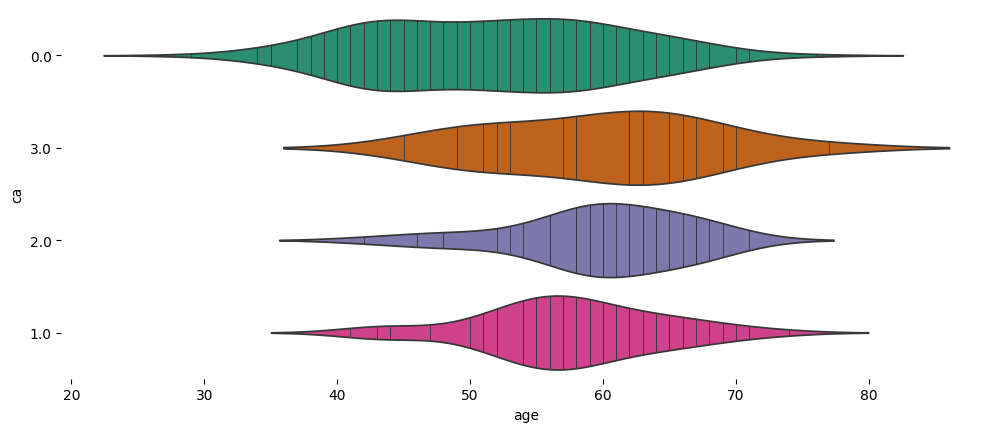

In [ ]:
# @title ca vs age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['ca'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='age', y='ca', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

The violin plot displays the distribution of age across different values of ca (number of major vessels colored by fluoroscopy), including an unknown category labeled "?". Each "violin" represents the age distribution for a specific ca value, with the width indicating the density of data points.

Key observations:

ca = 0: The age distribution is broad, with a dense concentration in the middle range (40-60 years).<br>
ca = 1: This group has a narrower age distribution, primarily concentrated between 50 and 60 years.<br>
ca = 2: The age range is also narrower, centered around the 50s, with few values extending beyond 70.<br>
ca = 3: Shows a broader distribution, similar to ca = 0, but with fewer younger individuals.<br>


<strong><h1>How are values distributed based on biological sex?</h1> </strong>

<ipython-input-15-2f1cf30b9f4d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='sex', y=var, inner='stick', palette='Dark2')


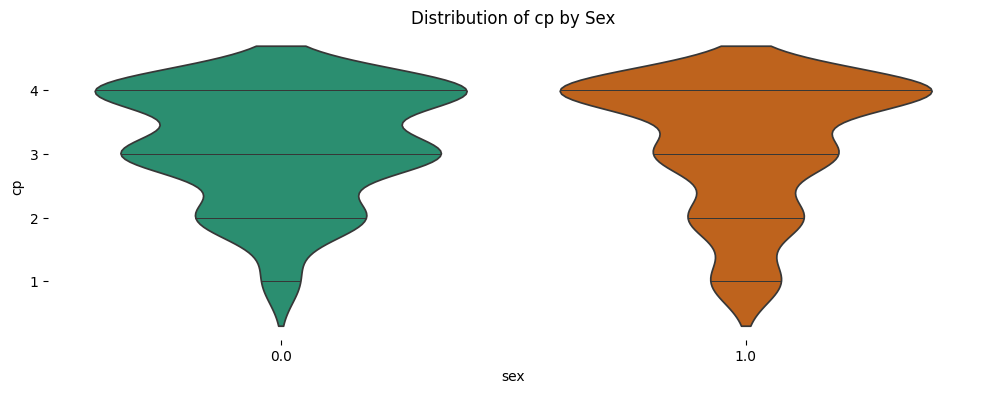

<ipython-input-15-2f1cf30b9f4d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='sex', y=var, inner='stick', palette='Dark2')


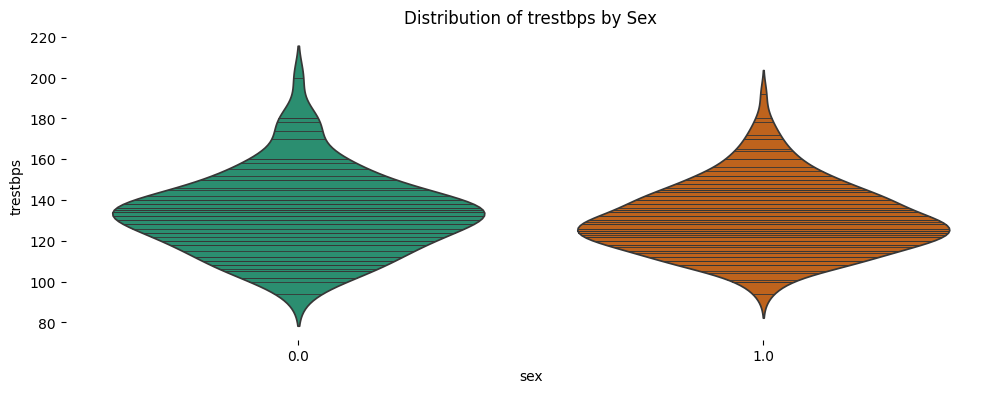

<ipython-input-15-2f1cf30b9f4d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='sex', y=var, inner='stick', palette='Dark2')


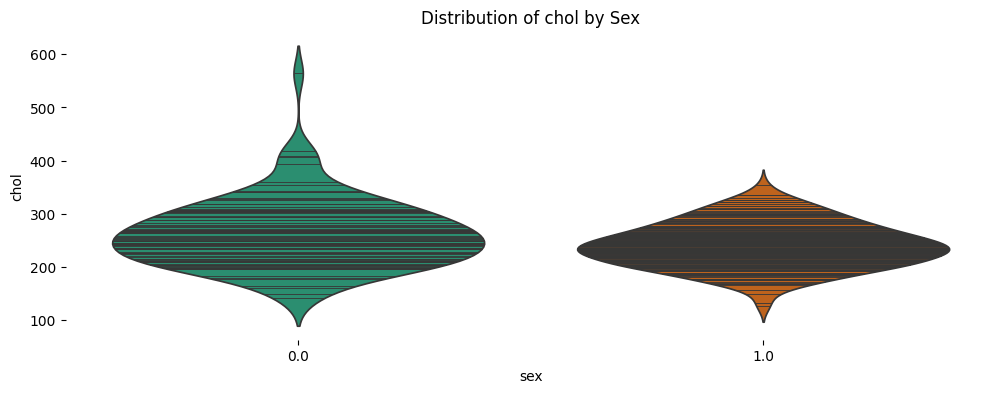

<ipython-input-15-2f1cf30b9f4d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='sex', y=var, inner='stick', palette='Dark2')


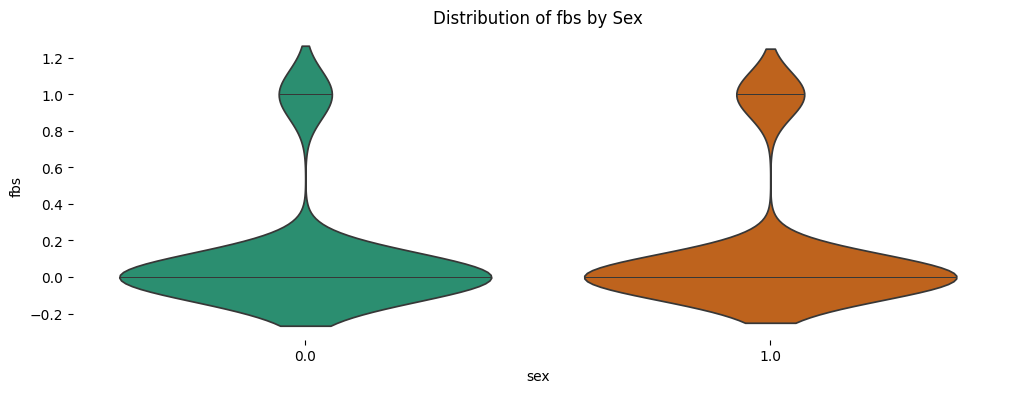

<ipython-input-15-2f1cf30b9f4d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='sex', y=var, inner='stick', palette='Dark2')


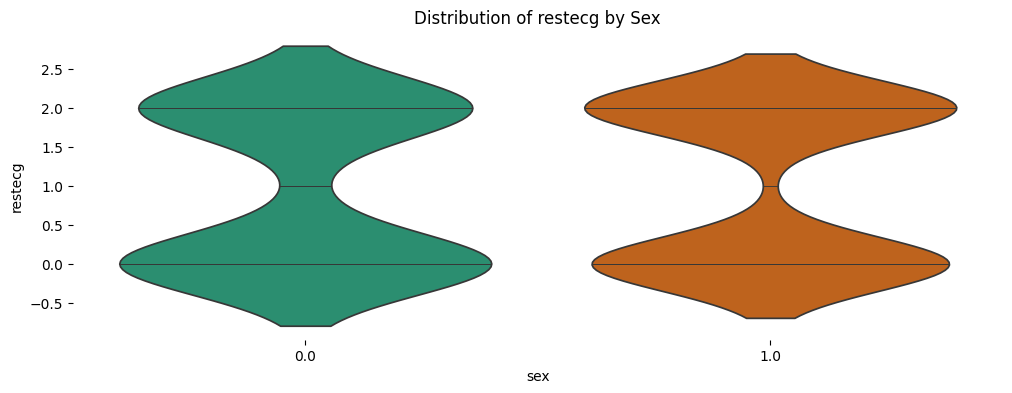

<ipython-input-15-2f1cf30b9f4d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='sex', y=var, inner='stick', palette='Dark2')


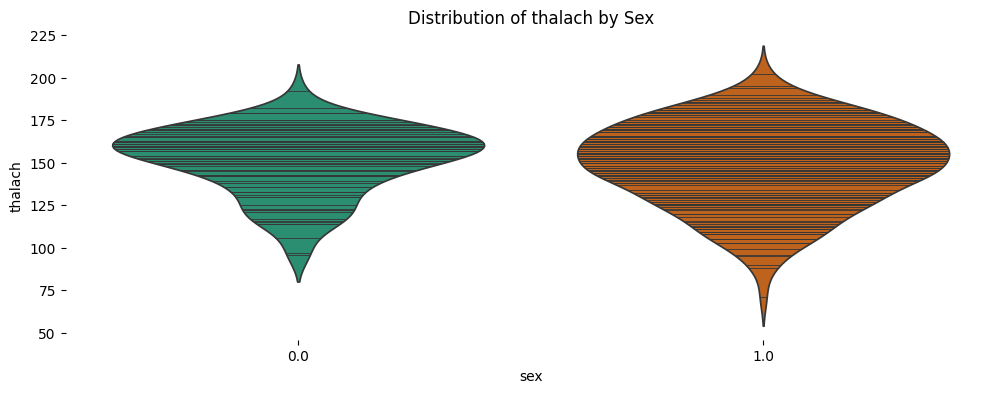

<ipython-input-15-2f1cf30b9f4d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='sex', y=var, inner='stick', palette='Dark2')


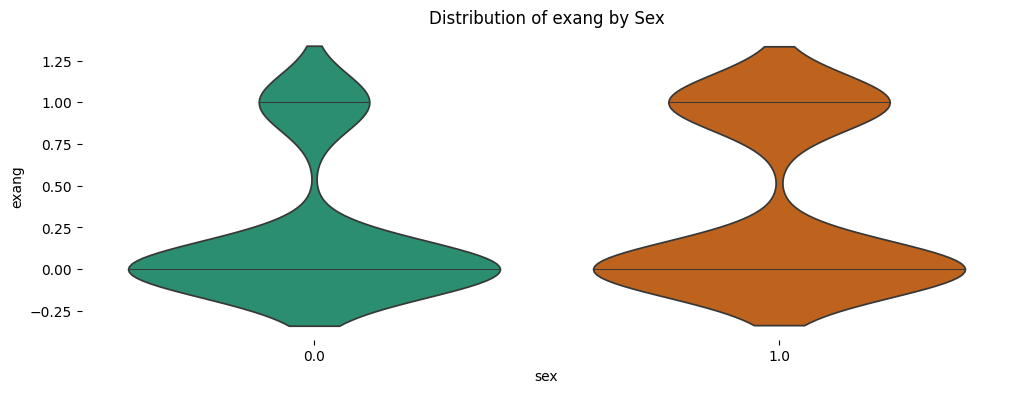

<ipython-input-15-2f1cf30b9f4d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='sex', y=var, inner='stick', palette='Dark2')


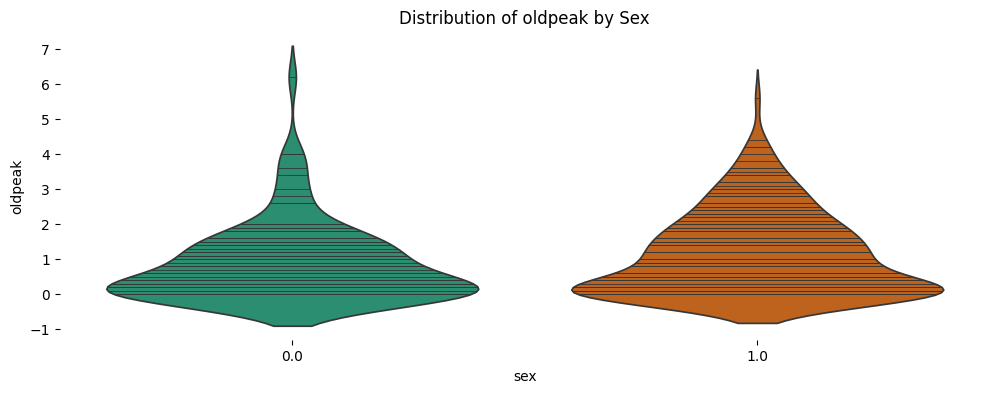

<ipython-input-15-2f1cf30b9f4d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='sex', y=var, inner='stick', palette='Dark2')


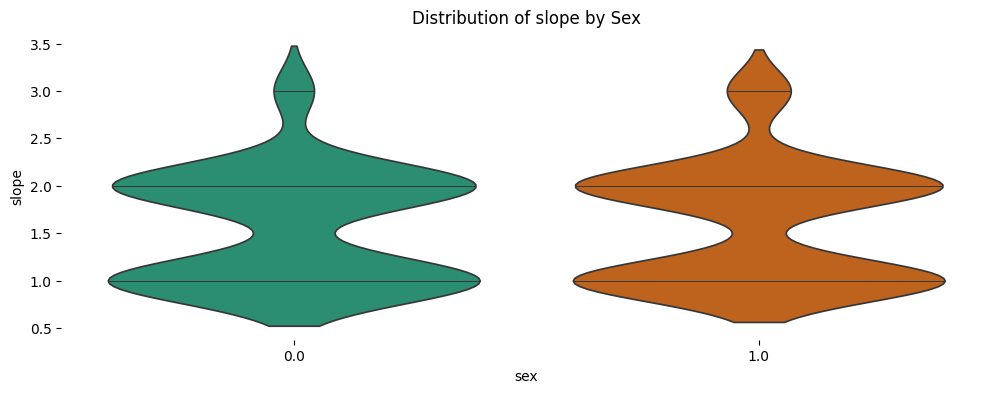

<ipython-input-15-2f1cf30b9f4d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='sex', y=var, inner='stick', palette='Dark2')


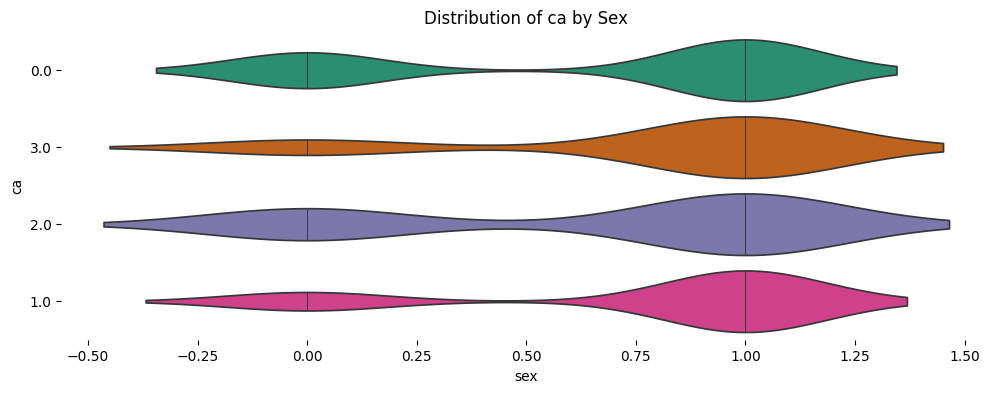

<ipython-input-15-2f1cf30b9f4d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='sex', y=var, inner='stick', palette='Dark2')


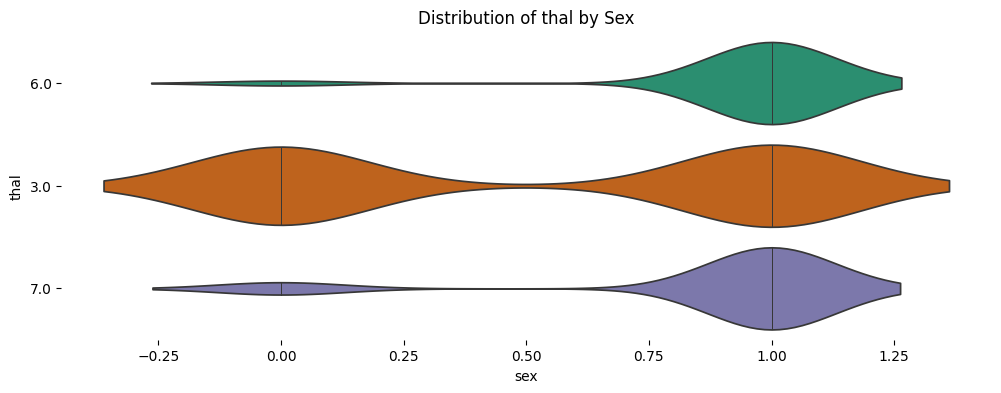

<ipython-input-15-2f1cf30b9f4d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='sex', y=var, inner='stick', palette='Dark2')


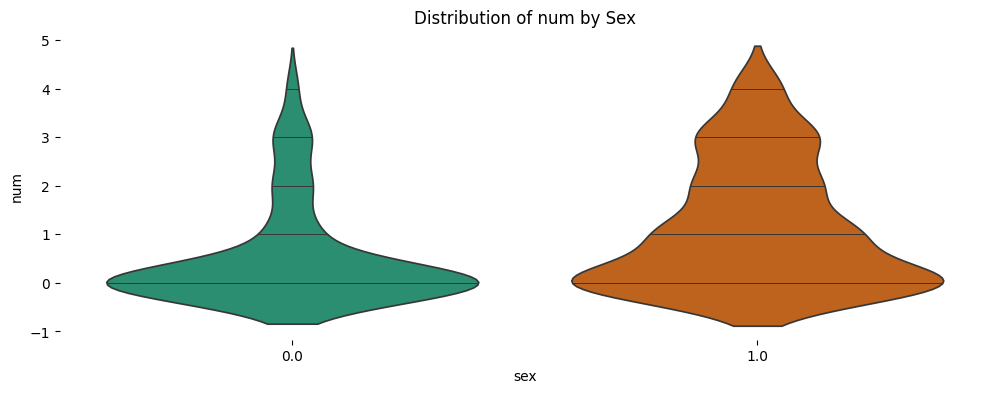

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of variables you want to analyze by sex
variables = ['cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

# Loop over variables and create a violin plot for each
for var in variables:
    plt.figure(figsize=(12, 4))
    sns.violinplot(data=df, x='sex', y=var, inner='stick', palette='Dark2')
    plt.title(f'Distribution of {var} by Sex')
    sns.despine(top=True, right=True, bottom=True, left=True)
    plt.show()


Differences

<strong>Distribution of Chestpain Type Based on Sex:</strong><br>
This violin plot shows the distribution of cp (chest pain type) based on sex. Here are some key observations:

Sex = 0 (likely female): The distribution shows a higher concentration around cp = 3 and 4, with fewer instances of cp = 1 and 2.

Sex = 1 (likely male): The distribution is somewhat similar, with a concentration around cp = 3, but also shows more balance across all chest pain types (1 to 4).

This suggests that both sexes tend to experience higher values of cp, but males exhibit a slightly more even distribution across the chest pain types. Chest pain type is a categorical feature that could be associated with the severity or type of heart disease.<br>
<strong>Distribution of Resting Blood Pressure Based on Sex:</strong><br>
This violin plot illustrates the distribution of trestbps (resting blood pressure) based on sex.

Key observations:

Sex = 0 (likely female): The distribution is centered around 130 to 140 mm Hg, with a longer tail reaching up to around 200 mm Hg, indicating that some females have higher resting blood pressure.

Sex = 1 (likely male): The distribution is also centered around 130 to 140 mm Hg but is more symmetric and slightly narrower, with fewer extreme values compared to females.

Overall, both sexes have a similar central tendency for resting blood pressure, but females appear to have a broader range, including some higher values. This difference could indicate slight variations in blood pressure characteristics between sexes in this dataset.<br>
<strong>Diffference in cholesterol based on sex: </strong><br>

This violin plot shows the distribution of chol (cholesterol levels) based on sex.

Key observations:

Sex = 0 (likely female): The distribution is broad, with a concentration around 200 to 300 mg/dL but also includes some extreme values, reaching as high as 600 mg/dL. This suggests a wider variability in cholesterol levels among females, with a few individuals having significantly high cholesterol.

Sex = 1 (likely male): The distribution is narrower and primarily centered around 200 to 300 mg/dL, with fewer extreme values compared to females.

Both sexes generally have cholesterol levels around 200 to 300 mg/dL, but females show a wider range, including higher cholesterol values. This difference might reflect variations in cholesterol-related risk factors between sexes in the dataset. <br>

<strong> Difference fasting blood sugar based on biological sex: </strong><br>
This violin plot displays the distribution of fbs (fasting blood sugar > 120 mg/dL, where 1 indicates fasting blood sugar is greater than 120 mg/dL) based on sex.

Key observations:

Sex = 0 (likely female): The distribution is mostly centered at 0, indicating that the majority of females have fasting blood sugar levels below 120 mg/dL. A smaller portion is at 1, representing elevated fasting blood sugar.

Sex = 1 (likely male): The distribution is similar, with most values at 0 and a smaller peak at 1.

Overall, both sexes exhibit a similar distribution in fasting blood sugar levels, with the majority of individuals having levels below 120 mg/dL. There is a smaller portion in each group with elevated levels (1), but no notable differences between sexes in this variable.

<strong> Distribution of resting electrocardiographic results based on biological sex:</strong><br>

This violin plot shows the distribution of restecg (resting electrocardiographic results) based on sex.

Key observations:

Sex = 0 (likely female): The distribution has three distinct peaks at 0, 1, and 2, which represent different categories of resting ECG results. Most females are concentrated around 0 and 1.

Sex = 1 (likely male): The distribution is similar, with peaks at 0, 1, and 2. However, the density at 1 is slightly higher compared to females, suggesting that this ECG result is slightly more common among males.

Overall, both sexes have a similar distribution across the different ECG result categories, with the majority falling in categories 0 and 1. This plot indicates that there are no significant differences between males and females in terms of resting ECG results in this dataset.

<strong> Distribution of Maximum Heart Rate Achieved Based on biological sex: </strong><br>
This violin plot displays the distribution of thalach (maximum heart rate achieved) based on sex.

Key observations:

Sex = 0 (likely female): The distribution peaks around 150-175 bpm, with values ranging from about 70 to 200 bpm. There is a relatively even spread around the peak.

Sex = 1 (likely male): The distribution is similar, also peaking around 150-175 bpm. The range is almost identical, from around 75 to 200 bpm, with a slightly more uniform distribution.

Both sexes have a comparable range and peak for maximum heart rate, suggesting that there are no significant differences between males and females in this variable within this dataset. The concentration around 150-175 bpm indicates that most individuals in this dataset achieve their maximum heart rate in this range.<br>

<strong>Distribution of exang (exercise-induced angina, where 1 indicates presence and 0 absence) based on sex.</strong><br>
This violin plot shows the distribution of exang (exercise-induced angina, where 1 indicates presence and 0 absence) based on sex.

Key observations:

Sex = 0 (likely female): The distribution is primarily centered around 0, indicating that most females do not experience exercise-induced angina. There is a smaller peak at 1, suggesting that a few females do have angina triggered by exercise.

Sex = 1 (likely male): The distribution is similar, with the majority of males also at 0 (no exercise-induced angina) and a smaller portion at 1.

Both sexes exhibit a similar pattern, with most individuals not experiencing exercise-induced angina. This suggests that exercise-induced angina is relatively uncommon in this dataset and shows no significant differences between males and females.<br>

<strong>distribution of oldpeak (ST depression induced by exercise relative to rest):</strong> <br>

This violin plot shows the distribution of oldpeak (ST depression induced by exercise relative to rest) based on sex.

Key observations:

Sex = 0 (likely female): The distribution is centered around 0 to 1, indicating that most females have lower ST depression values. However, there are a few higher values, reaching up to 7, suggesting a wider range among females.

Sex = 1 (likely male): The distribution is similar, with most values concentrated between 0 and 1. Males also show a range of values, though there are fewer extreme values compared to females.

Overall, both sexes have a similar central tendency for oldpeak, with the majority of values around 0 to 1. However, females exhibit a broader range, including some higher ST depression values. This suggests that, while most individuals have similar oldpeak values, females may experience a wider variation in ST depression induced by exercise.<br>
<strong>distribution of slope (slope of the peak exercise ST segment) based on sex:</strong> <br>
Value 1 (Upsloping): This indicates an upward slope of the ST segment, which can sometimes be associated with a lower risk of heart issues.<br>
Value 2 (Flat): A flat ST segment is often considered a neutral indicator but can be associated with some cardiac concerns, depending on other factors.<br>
Value 3 (Downsloping): A downsloping ST segment is often a marker for cardiac issues and is more concerning.<br>
With this context, here’s a refined summary of the plot:

Sex = 0 (likely female): Most females have a flat slope (2), which is typically neutral. A smaller proportion of females have upsloping (1) and downsloping (3) slopes.<br>

Sex = 1 (likely male): Males show a similar pattern, with the majority having a flat slope (2). There are fewer instances of upsloping (1) and downsloping (3) slopes.<br>

In summary, both sexes tend to have a flat slope during peak exercise, which might be considered a more neutral indicator. There’s no significant difference in the distribution of slope types between males and females, but the presence of downsloping in some cases could warrant further analysis, as it might correlate with cardiac risk.<br>

<strong>  distribution of ca (number of major vessels colored by fluoroscopy, ranging from 0 to 3) based on sex:</strong><br>

This violin plot shows the distribution of ca (number of major vessels colored by fluoroscopy, ranging from 0 to 3) based on sex.

Key observations:

Sex = 0 (likely female): The distribution is more concentrated around ca = 0 and ca = 2, indicating that most females have fewer colored vessels, with zero or two vessels being common.

Sex = 1 (likely male): The distribution is similar, with concentrations around ca = 0 and ca = 2, but also includes more instances of ca = 1 and ca = 3, suggesting a slightly broader range for males.

Overall, both sexes have a similar pattern, with ca = 0 (no colored vessels) being the most common, but males show a more even distribution across all values (0 to 3). This might suggest a slightly higher likelihood of multiple vessels being involved in males compared to females in this dataset.<br>

<strong>distribution of thal (thallium stress test results) based on sex:</strong><br>
This violin plot shows the distribution of thal (thallium stress test results) based on sex.

Key observations:

Thal = 3 (Normal): This category has a similar distribution for both sexes, with a fairly even spread. It appears to be the most common result across both male and female participants.

Thal = 6 (Fixed Defect): Predominantly present among females (Sex = 0), suggesting that a fixed defect in the thallium test is more frequently observed in females within this dataset.

Thal = 7 (Reversible Defect): This category shows a slightly more balanced distribution between sexes, with a modest presence among both males and females.

In summary, thal = 3 (normal) is the most frequent outcome for both sexes. Thal = 6 (fixed defect) is more common among females, while thal = 7 (reversible defect) is present in both sexes. This suggests that normal results are most prevalent, with some differences in defect types between males and females.<br>
 <strong>distribution of num (the target variable indicating heart disease presence and severity, where higher values suggest more severe disease) based on sex:</strong><br>
 This violin plot shows the distribution of num (the target variable indicating heart disease presence and severity, where higher values suggest more severe disease) based on sex.

Key observations:

Sex = 0 (likely female): The distribution peaks at num = 0, indicating that a significant portion of females in the dataset have no or minimal heart disease. However, there are also smaller peaks at higher values (up to 4), representing varying degrees of heart disease among some females.<br>

Sex = 1 (likely male): The distribution is more spread across different values of num, indicating that males are more likely to have higher levels of heart disease severity, with a substantial presence at each level (from 1 to 4).<br>

Overall, females in the dataset tend to have lower heart disease severity, with most having num = 0. Males show a broader distribution, with a higher likelihood of moderate to severe heart disease. This suggests that, in this dataset, heart disease presence and severity may be more common among males than females.

<strong>How the target variable is distributed based on sex:</strong><br>
This violin plot shows the distribution of num (heart disease severity) based on sex.

Key observations:

Sex = 0 (likely female): The distribution is highly concentrated at num = 0, indicating that most females in the dataset have no or minimal heart disease. There are only a few instances with higher values, representing mild to moderate heart disease.

Sex = 1 (likely male): The distribution shows a wider spread across all levels of num (from 0 to 4), suggesting that males have a higher likelihood of experiencing various levels of heart disease severity, including more severe cases.

In summary, females are predominantly at num = 0 (indicating no heart disease), while males have a more diverse range of heart disease severity, with a significant portion experiencing moderate to severe disease. This suggests that, within this dataset, heart disease is more common and severe among males than females.

<ipython-input-16-13e4e135d1a8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='sex', y='age', inner='stick', palette='Dark2')


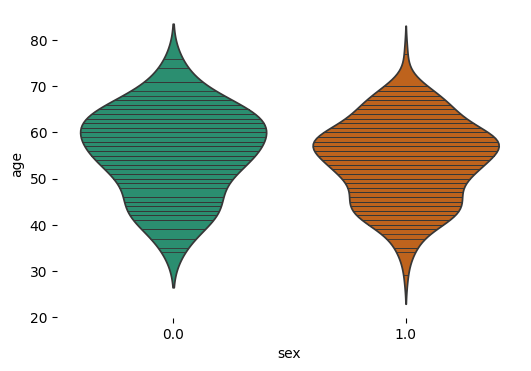

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.violinplot(data=df, x='sex', y='age', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.show()


<strong> Distribution of age based on biological sex </strong>
This violin plot shows the distribution of age based on sex.

Key observations:

Sex = 0 (likely female): The age distribution for females is centered around 50 to 60 years, with a broader spread from around 30 to 80. There is a peak around the mid-50s, indicating this is a common age range for females in the dataset.

Sex = 1 (likely male): The age distribution for males is also centered around 50 to 60 years, with a similar spread from around 30 to 80. There is a slightly narrower shape compared to females, but the distribution is generally similar.

Overall, both sexes have a similar age range and distribution pattern, with most individuals between 50 and 60 years old. The dataset appears to include a wide age range for both males and females, but with no significant difference in age distribution between the sexes.

<h1><strong>Applying transformations to the data.</strong></h1>

In [ ]:
from scipy import stats
import numpy as np
from pandas.plotting import scatter_matrix

<strong>trestbps (resting blood pressure) and chol (cholesterol) </strong> will be transformed using a logarithmic scale because their distributions are right-skewed.

<strong>thalach (maximum heart rate achieved)</strong> has a left-skewed distribution. Therefore, I will apply both a square transformation and a logarithmic transformation to determine which one better normalizes the distribution.

<strong><h2>trestbps (resting blood pressure) and chol (cholesterol)</h2></strong>

In [ ]:
df['trestbps_log'] = np.log(df['trestbps'] + 1)
df['chol_log'] = np.log(df['chol'] + 1)

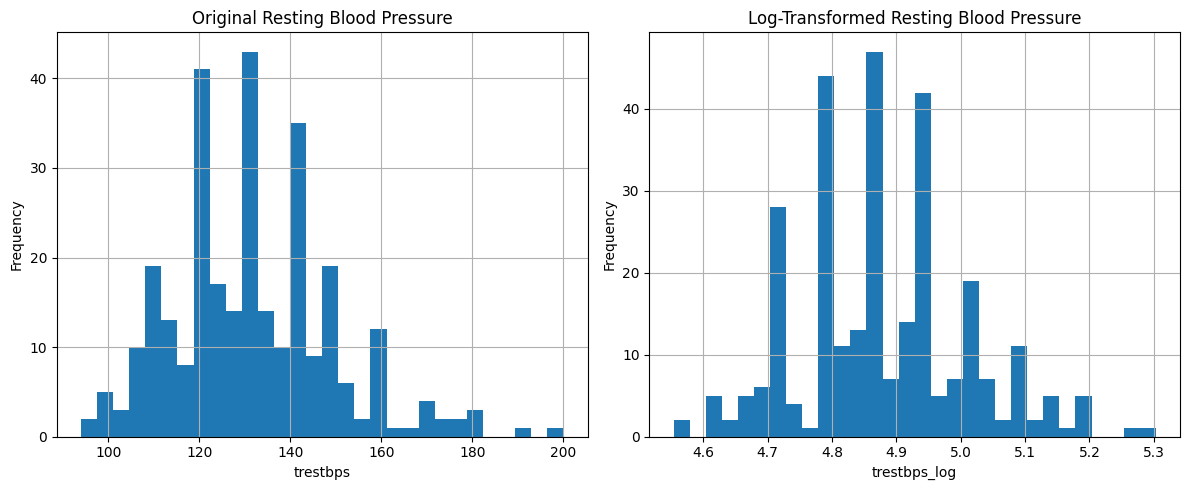

In [ ]:
# Set up a subplot grid with only two charts (one row, two columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Adjusted the grid size and figure size for two plots

# Plotting the original distribution of 'trestbps' (resting blood pressure)
df['trestbps'].hist(ax=axes[0], bins=30)
axes[0].set_title('Original Resting Blood Pressure')
axes[0].set_xlabel('trestbps')
axes[0].set_ylabel('Frequency')

# Plotting the log-transformed distribution of 'trestbps'
#df['trestbps_log'] = np.log(df['trestbps'] + 1)  # Apply log transformation to avoid log(0) issues
df['trestbps_log'].hist(ax=axes[1], bins=30)
axes[1].set_title('Log-Transformed Resting Blood Pressure')
axes[1].set_xlabel('trestbps_log')
axes[1].set_ylabel('Frequency')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()



<h3>Comparison of Original and Log-Transformed Resting Blood Pressure Distributions</h3>

<strong>Original Distribution (Left):</strong>
<ul>
    <li>The histogram shows a right-skewed distribution, with a higher concentration of values around 120–140.</li>
    <li>There are fewer occurrences of higher blood pressure values, creating a tail that extends towards 200.</li>
    <li>This right skew suggests that most individuals have lower to moderate resting blood pressures, with fewer individuals having very high values.</li>
</ul>

<strong>Log-Transformed Distribution (Right):</strong>
<ul>
    <li>After applying a logarithmic transformation, the distribution is more symmetric and appears closer to a normal distribution.</li>
    <li>The transformation compresses the range of higher values, reducing the impact of extreme outliers and balancing the spread of values.</li>
    <li>The peak around 4.7–5.0 indicates a more centralized concentration, making the data more normally distributed.</li>
</ul>

<strong>Inference:</strong> The log transformation effectively normalizes the right-skewed distribution, making it more symmetric and suitable for statistical analyses that assume normality. This transformation helps to reduce the influence of high blood pressure outliers, resulting in a distribution that is more evenly spread across the range of values.


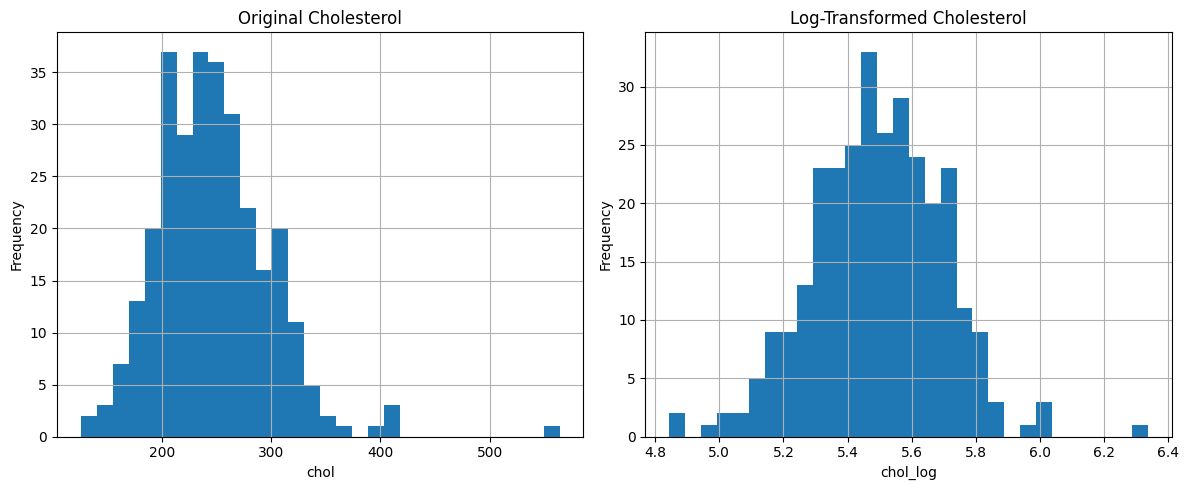

In [ ]:
# Set up a subplot grid with only two charts (one row, two columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Adjusted the grid size and figure size for two plots

# Plotting the original distribution of 'chol' (cholesterol)
df['chol'].hist(ax=axes[0], bins=30)
axes[0].set_title('Original Cholesterol')
axes[0].set_xlabel('chol')
axes[0].set_ylabel('Frequency')

# Plotting the log-transformed distribution of 'chol'
#df['chol_log'] = np.log(df['chol'] + 1)  # Apply log transformation to avoid log(0) issues
df['chol_log'].hist(ax=axes[1], bins=30)
axes[1].set_title('Log-Transformed Cholesterol')
axes[1].set_xlabel('chol_log')
axes[1].set_ylabel('Frequency')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


<h3>Comparison of Original and Log-Transformed Cholesterol Distributions</h3>

<strong>Original Distribution (Left):</strong>
<ul>
    <li>The histogram shows a right-skewed distribution with a concentration of values around 200–300.</li>
    <li>There are a few higher cholesterol values, creating a tail extending beyond 400, which is characteristic of right-skewed data.</li>
    <li>The skew suggests that most individuals have cholesterol levels in the lower to moderate range, with fewer individuals having very high cholesterol levels.</li>
</ul>

<strong>Log-Transformed Distribution (Right):</strong>
<ul>
    <li>After applying a logarithmic transformation, the distribution becomes more symmetric and closer to a normal distribution.</li>
    <li>The log transformation compresses the range of higher cholesterol values, reducing the impact of extreme values and balancing the spread.</li>
    <li>The peak around 5.4–5.6 indicates a more centralized distribution.</li>
</ul>

<strong>Inference:</strong> The log transformation successfully normalizes the right-skewed distribution, making it more symmetric and suitable for statistical analyses that assume normality. This transformation reduces the effect of extreme cholesterol values, creating a more balanced distribution across the range.


<h2><strong>thalach (maximum heart rate achieved)</strong>

In [ ]:
df['thalach_log'] = np.log(df['thalach'] + 1)

In [ ]:
df['thalach_squared'] = np.power(df['thalach'], 2)

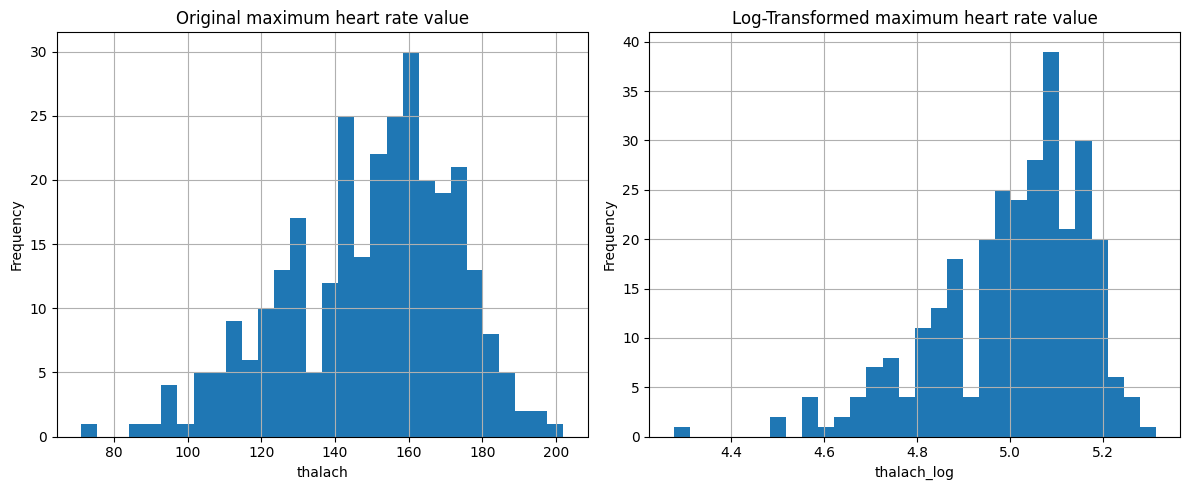

In [ ]:
# Set up a subplot grid with only two charts (one row, two columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Adjusted the grid size and figure size for two plots

# Plotting the original distribution of 'chol' (cholesterol)
df['thalach'].hist(ax=axes[0], bins=30)
axes[0].set_title('Original maximum heart rate value')
axes[0].set_xlabel('thalach')
axes[0].set_ylabel('Frequency')

# Plotting the log-transformed distribution of 'chol'
#df['thalach_log'] = np.log(df['thalach'] + 1)  # Apply log transformation to avoid log(0) issues
df['thalach_log'].hist(ax=axes[1], bins=30)
axes[1].set_title('Log-Transformed maximum heart rate value')
axes[1].set_xlabel('thalach_log')
axes[1].set_ylabel('Frequency')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

<h3>Comparison of Original and Log-Transformed Distributions of Maximum Heart Rate (thalach)</h3>

<strong>1. Original Distribution (Left):</strong>
<ul>
    <li>The original distribution has a left skew, with most values concentrated between 140 and 160.</li>
    <li>There is a short tail on the lower end, extending down to around 80.</li>
    <li>This skew indicates that higher maximum heart rates are more common, with fewer occurrences of lower values.</li>
</ul>

<strong>2. Log-Transformed Distribution (Right):</strong>
<ul>
    <li>The log transformation reduces the range of values, and while it adjusts the distribution slightly, it has not fully normalized it.</li>
    <li>The skew persists, although the log transformation has compressed the higher values and spread out the lower ones.</li>
    <li>The peak around 5.0 suggests a clustering of log-transformed values, but the distribution remains asymmetric.</li>
</ul>

<strong>Inference:</strong> The log transformation did not completely normalize the left-skewed distribution of <strong>thalach</strong> but has moderated it somewhat. It may be useful for analyses requiring a less skewed distribution, though further normalization methods, such as a square root transformation, might provide better results.


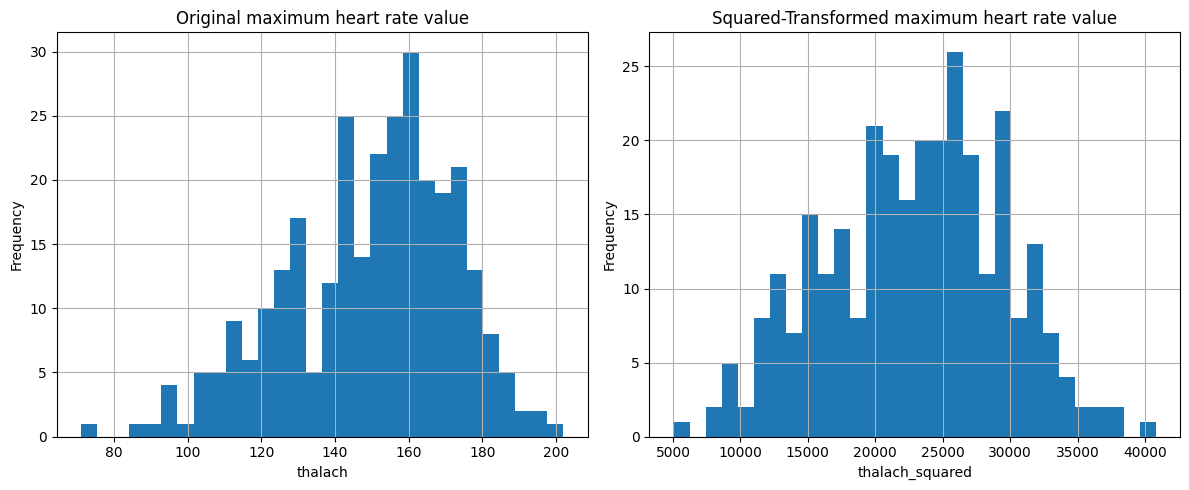

In [ ]:
# Set up a subplot grid with only two charts (one row, two columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Adjusted the grid size and figure size for two plots

# Plotting the original distribution of 'chol' (cholesterol)
df['thalach'].hist(ax=axes[0], bins=30)
axes[0].set_title('Original maximum heart rate value')
axes[0].set_xlabel('thalach')
axes[0].set_ylabel('Frequency')

# Plotting the log-transformed distribution of 'chol'
#df['thalach_log'] = np.log(df['thalach'] + 1)  # Apply log transformation to avoid log(0) issues
df['thalach_squared'].hist(ax=axes[1], bins=30)
axes[1].set_title('Squared-Transformed maximum heart rate value')
axes[1].set_xlabel('thalach_squared')
axes[1].set_ylabel('Frequency')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

<h3>Comparison of Original and Squared-Transformed Distributions of Maximum Heart Rate (thalach)</h3>

<strong>Original Distribution (Left):</strong>
<ul>
    <li>The histogram displays a left-skewed distribution, with the majority of values concentrated around 140–160.</li>
    <li>There is a shorter tail on the lower end, with values going down to around 80.</li>
    <li>This left skew indicates that most individuals have higher maximum heart rates, with fewer cases of lower maximum heart rates.</li>
</ul>

<strong>Squared-Transformed Distribution (Right):</strong>
<ul>
    <li>After applying a square transformation, the distribution remains left-skewed, although the values are spread out over a larger range.</li>
    <li>The transformation amplifies the higher values, increasing the distance between the peaks.</li>
    <li>The distribution does not achieve symmetry, indicating that the square transformation was not effective in normalizing this left-skewed distribution.</li>
</ul>

<strong>Inference:</strong> The square transformation did not successfully normalize the left-skewed distribution of <strong>thalach</strong>. While it spreads out the values over a larger range, the skew remains. An alternative transformation, such as a logarithmic or square root transformation, might better suit this data for achieving normality.


<h3>Comparison of Log-Transformed and Squared-Transformed Distributions of Maximum Heart Rate (thalach)</h3>

<p>The <strong>log-transformed distribution</strong> appears to have done a better job of moderating the skew in the <strong>thalach</strong> (maximum heart rate) distribution than the <strong>squared-transformed distribution</strong>.</p>

<strong>Here’s the comparison:</strong>

<strong>Squared Transformation:</strong>
<ul>
    <li>This amplified the higher values, stretching the distribution further to the right without reducing the left skew.</li>
    <li>It did not achieve symmetry and actually made the distribution more spread out.</li>
</ul>

<strong>Log Transformation:</strong>
<ul>
    <li>The log transformation compressed the higher values, reducing the overall spread and pulling the distribution closer to a central peak.</li>
    <li>Although the distribution remains slightly skewed, it is more balanced than with the squared transformation.</li>
</ul>

<strong>Conclusion:</strong> The log transformation was more effective in reducing skew and bringing the distribution closer to normality. For <strong>thalach</strong>, the log transformation provides a more usable distribution for analyses that assume normality or reduced skew.


<h1><strong>Examining the target Attribute</strong></h1>

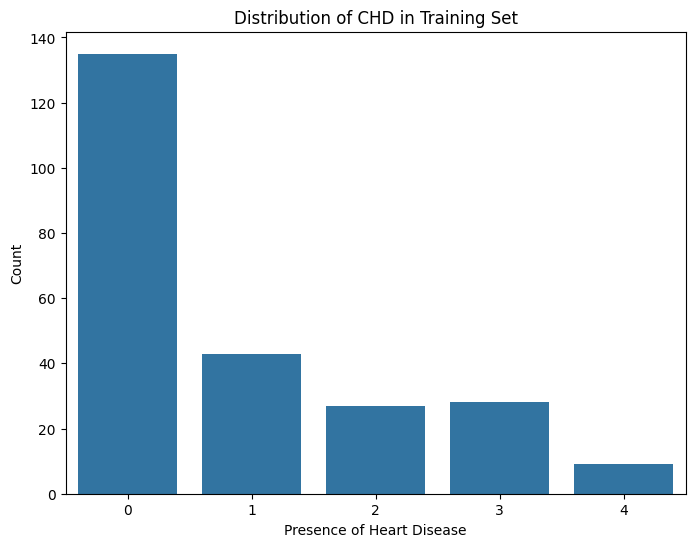

In [ ]:
import seaborn as sns

# Plot the distribution of the target attribute
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title('Distribution of CHD in Training Set')
plt.xlabel('Presence of Heart Disease')
plt.ylabel('Count')
plt.show()

<h3>Distribution of CHD (Coronary Heart Disease) Levels in Training Dataset</h3>

<strong>Key Points:</strong>
<ul>
    <li><strong>0 (No Heart Disease):</strong> This is the largest group, with around 140 individuals.</li>
    <li><strong>1 (Mild Heart Disease):</strong> The second-largest group, with a little over 40 individuals.</li>
    <li><strong>2 and 3 (Moderate to Severe Heart Disease):</strong> Each has about 20–25 individuals.</li>
    <li><strong>4 (Most Severe Heart Disease):</strong> This is the smallest group, with very few individuals.</li>
</ul>

<strong>Summary:</strong> The dataset is quite imbalanced, with most individuals having no heart disease and progressively fewer cases as severity increases. This imbalance might affect the model's ability to predict less common cases accurately, so handling this imbalance could improve model performance.


In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import OneHotEncoder

In [ ]:
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = np.log1p(X_copy[self.columns])
        return X_copy

# Define the columns to apply logarithmic transformation
log_transform_columns = ['trestbps', 'chol', 'thalach']

# Define the preprocessing pipeline
ct = ColumnTransformer(
    transformers=[
        ("log_transform", LogTransformer(log_transform_columns), log_transform_columns),
        ("scaling", StandardScaler(), ['age', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope']),
        ("onehot", OneHotEncoder(sparse_output=False), ['ca', 'thal'])
    ],
    remainder='drop'  # drop all other columns not specified
)

# Apply the transformations
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [ ]:
!pip install imblearn

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy of the model: 0.4918032786885246
F1 Score of the model: 0.43345457454216935
Precision: 0.628271734546466
Recall: 0.4918032786885246


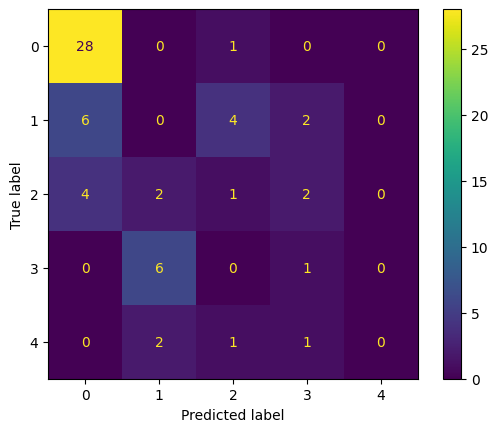

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,precision_score, recall_score
import matplotlib.pyplot as plt

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=10)

# Training the model on the training dataset
clf.fit(X_train, y_train)

# Performing predictions on the test dataset
y_pred = clf.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_pred, y_test, average="weighted")
recall = recall_score(y_pred, y_test, average="weighted")

# Print accuracy and F1 score
print(f"Accuracy of the model: {accuracy}")
print(f"F1 Score of the model: {f1}")
print("Precision:", precision)
print("Recall:", recall)


# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot()
plt.show()

In [ ]:
# Import the necessary library
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Train the model
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.45901639344262296
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.00      0.00      0.00        12
           2       0.17      0.22      0.19         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.46        61
   macro avg       0.19      0.22      0.21        61
weighted avg       0.40      0.46      0.43        61



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed

# Train the model
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.4918032786885246
              precision    recall  f1-score   support

           0       0.73      0.93      0.82        29
           1       0.08      0.08      0.08        12
           2       0.14      0.11      0.12         9
           3       0.20      0.14      0.17         7
           4       0.00      0.00      0.00         4

    accuracy                           0.49        61
   macro avg       0.23      0.25      0.24        61
weighted avg       0.41      0.49      0.44        61



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<h1><strong>Model Performance Review:</strong></h1>
<br>
Based on these results, it’s clear that these particular models are performing poorly on the data. It's worth noting that category four has very few entries, which could contribute to its especially poor performance.The next step will be to see if upsampling results in significant improvement.

<h1><strong>What if we upsampled the cleveland dataset?</strong></h1>

In [ ]:
from sklearn.utils import resample
import pandas as pd

# Assuming your target column is 'TenYearCHD'
target_column = 'num'

# Separate each class into different datasets
data_class_0 = df[df[target_column] == 0]
data_class_1 = df[df[target_column] == 1]
data_class_2 = df[df[target_column] == 2]
data_class_3 = df[df[target_column] == 3]
data_class_4 = df[df[target_column] == 4]

# Upsample the minority classes (1, 2, 3, and 4) to match the majority class (0)
data_class_1_upsampled = resample(data_class_1, replace=True, n_samples=len(data_class_0), random_state=123)
data_class_2_upsampled = resample(data_class_2, replace=True, n_samples=len(data_class_0), random_state=123)
data_class_3_upsampled = resample(data_class_3, replace=True, n_samples=len(data_class_0), random_state=123)
data_class_4_upsampled = resample(data_class_4, replace=True, n_samples=len(data_class_0), random_state=123)

# Combine the majority class with the upsampled minority classes
df_upsampled = pd.concat([data_class_0, data_class_1_upsampled, data_class_2_upsampled, data_class_3_upsampled, data_class_4_upsampled])

# Shuffle the dataset to mix the classes
df_upsampled = df_upsampled.sample(frac=1, random_state=123).reset_index(drop=True)



In [ ]:
from sklearn.model_selection import train_test_split

# Assuming `df` is your DataFrame
# Drop the unique identifier and the target column from features
X = df_upsampled.drop(columns=['num'])

# Separate the target
y = df_upsampled['num']

# Split the data
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, X_train and X_test contain only relevant feature columns
# y_train and y_test contain only the target variable

In [ ]:
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = np.log1p(X_copy[self.columns])
        return X_copy

# Define the columns to apply logarithmic transformation
log_transform_columns = ['trestbps', 'chol', 'thalach']

# Define the preprocessing pipeline
ct = ColumnTransformer(
    transformers=[
        ("log_transform", LogTransformer(log_transform_columns), log_transform_columns),
        ("scaling", StandardScaler(), ['age', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope']),
        ("onehot", OneHotEncoder(sparse_output=False), ['ca', 'thal'])
    ],
    remainder='drop'  # drop all other columns not specified
)

# Apply the transformations
X_train_up = ct.fit_transform(X_train_up)
X_test_up = ct.transform(X_test_up)

In [ ]:
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed

# Train the model
knn_classifier.fit(X_train_up, y_train_up)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test_up)

# Evaluate the model
accuracy = accuracy_score(y_test_up, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test_up, y_pred))

Accuracy: 0.825
              precision    recall  f1-score   support

           0       0.83      0.69      0.75        29
           1       0.77      0.80      0.78        25
           2       0.70      0.77      0.73        30
           3       0.91      0.82      0.86        38
           4       0.88      1.00      0.94        38

    accuracy                           0.82       160
   macro avg       0.82      0.81      0.81       160
weighted avg       0.83      0.82      0.82       160



In [ ]:
# Import the necessary library
#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Train the model
xgb_classifier.fit(X_train_up, y_train_up)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_up)

# Evaluate the model
accuracy = accuracy_score(y_test_up, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test_up, y_pred))

Accuracy: 0.95625
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        29
           1       0.96      0.96      0.96        25
           2       0.91      1.00      0.95        30
           3       1.00      0.92      0.96        38
           4       0.95      1.00      0.97        38

    accuracy                           0.96       160
   macro avg       0.96      0.96      0.95       160
weighted avg       0.96      0.96      0.96       160



<h1><strong>Model Performance Review:</strong></h1>
<br>
Upsampling the data appears to have significantly improved model performance. However, given that certain categories, like category 4, had very few original entries, this improvement may not be representative of real-world data.The next step will be to evaluate how well these models classify the overall presence of heart disease. To do this, I’ll create a new column that indicates whether heart disease is present (1) or absent (0).

In [ ]:
# Create a new dataframe with a new binary column based on the values in 'num'
df_binary_col = df.copy()
df_binary_col['num_binary'] = df_binary_col['num'].apply(lambda x: 1 if x in [1, 2, 3, 4] else 0)


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming `df` is your DataFrame
# Drop the unique identifier and the target column from features
X_binary = df_binary_col.drop(columns=['num_binary'])

# Separate the target
y_binary = df_binary_col['num_binary']

# Split the data
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

# Now, X_train and X_test contain only relevant feature columns
# y_train and y_test contain only the target variable

In [ ]:
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = np.log1p(X_copy[self.columns])
        return X_copy

# Define the columns to apply logarithmic transformation
log_transform_columns = ['trestbps', 'chol', 'thalach']

# Define the preprocessing pipeline
ct = ColumnTransformer(
    transformers=[
        ("log_transform", LogTransformer(log_transform_columns), log_transform_columns),
        ("scaling", StandardScaler(), ['age', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope']),
        ("onehot", OneHotEncoder(sparse_output=False), ['ca', 'thal'])
    ],
    remainder='drop'  # drop all other columns not specified
)

# Apply the transformations
X_train_binary = ct.fit_transform(X_train_binary)
X_test_binary = ct.transform(X_test_binary)

In [ ]:
# Import the necessary library
#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Train the model
xgb_classifier.fit(X_train_binary, y_train_binary)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_binary)

# Evaluate the model
accuracy = accuracy_score(y_test_binary, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test_binary, y_pred))

Accuracy: 0.8166666666666667
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        36
           1       0.74      0.83      0.78        24

    accuracy                           0.82        60
   macro avg       0.81      0.82      0.81        60
weighted avg       0.82      0.82      0.82        60



<h2>Model Performance for general presence of Heart Disease</h2>
<br>
Models seem to perform inline with previous reseach based on UCI Irvine's visual for baseline performance<br>
Please see below visual:


.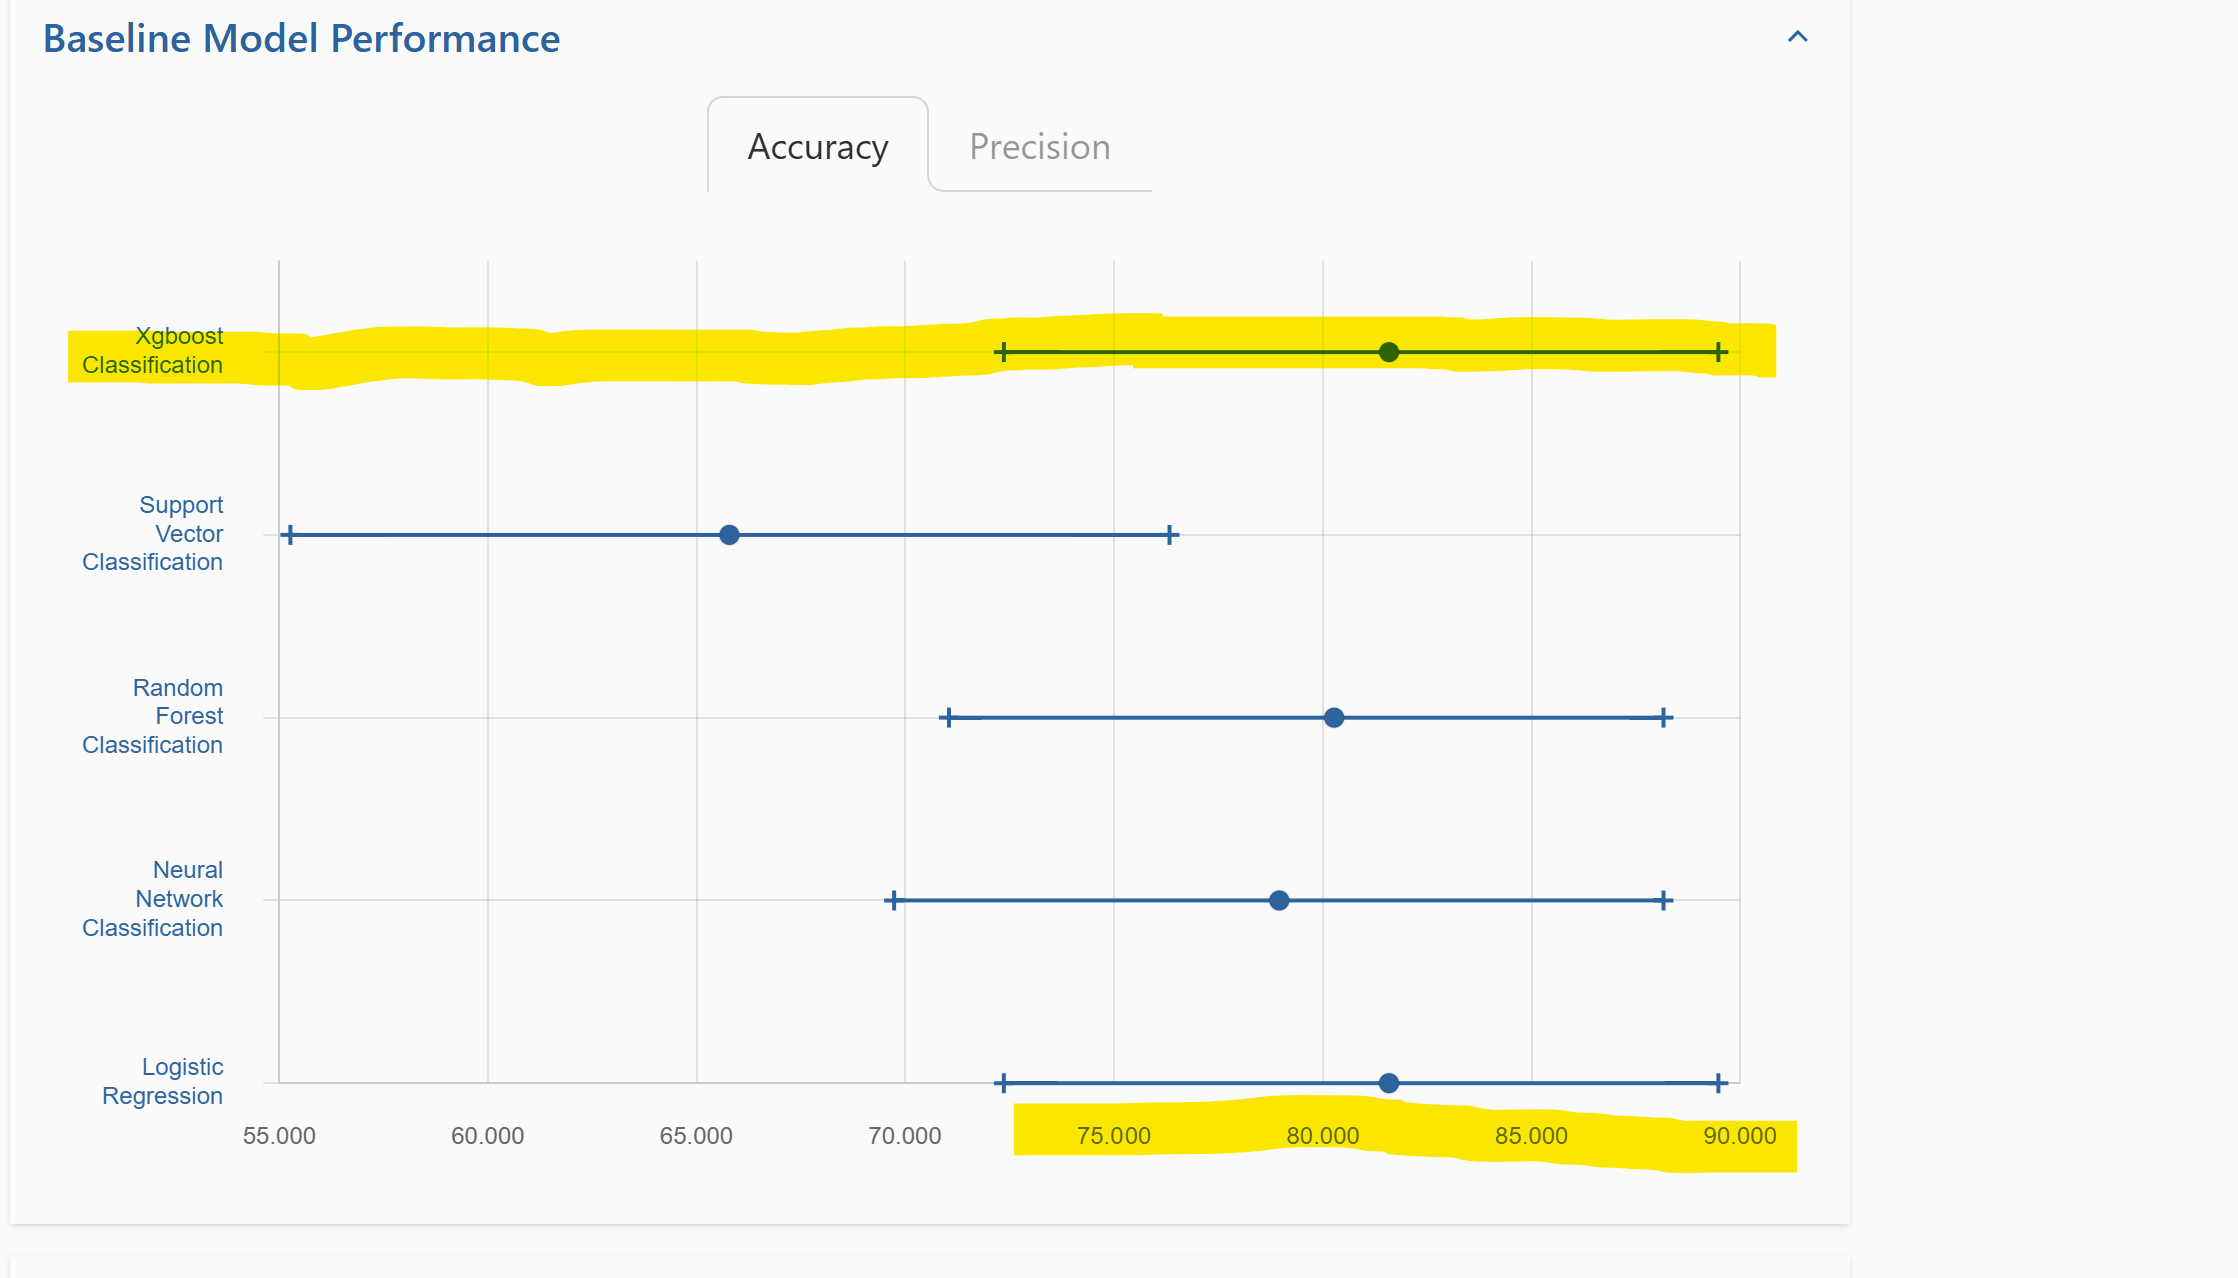